In [1]:
# Before we begin, run this cell if you are using Colab
# !git clone -b 3-ysi-tutorial https://github.com/nestauk/im-tutorials.git

In [2]:
!pip install selenium beautifulsoup4 pandas requests

# YSI Tutorial - Web Scraping

## Structure
1. HTML pages
2. Chrome DevTools
3. Web scraping packages
    * BeautifulSoup
        * Exercise
    * Selenium
        * Exercise
4. Ethical considerations of web scraping

## What you will be able to do after the tutorial
* Inspect an HTML page and identify which parts you want to scrape.
* Scrape web pages with `requests` and `BeautifulSoup`.
* Navigate Javascript elements with `Selenium`
* Judge when web scraping is the most suitable approach and what you should consider before doing so (be a good citizen of the Internet).

## HTML page structure

**Hypertext Markup Language (HTML)** is the standard markup language for documents designed to be displayed in a web browser. HTML describes the structure of a web page and it can be used with **Cascading Style Sheets (CSS)** and a scripting language such as **JavaScript** to create interactive websites. HTML consists of a series of elements that "tell" to the browser how to display the content. Lastly, elements are represented by **tags**.

Here are some tags:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.

<img src="figures/tags.png" width="512">

HTML has a tree-like 🌳 🌲 structure thanks to the **Document Object Model (DOM)**, a cross-platform and language-independent interface. Here's how a very simple HTML tree looks like.

<img src="figures/dom_tree.gif">

### Creating a simple HTML page

In [3]:
from IPython.core.display import display, HTML

In [4]:
display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>R</li>
    <li>Julia</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
    <li>Policy recommendations</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

## Chrome DevTools

[Chrome DevTools](https://developers.google.com/web/tools/chrome-devtools/) is a set of web developer tools built directly into the Google Chrome browser. DevTools can help you view and edit web pages. We will use Chrome's tool to inspect an HTML page and find which elements correspond to the data we might want to scrape.

### Short exercise
To get some experience with the HTML page structure and Chrome DevTools, we will search and locate elements in [IMDB](https://www.imdb.com/). 

**Tip**: Hit *Command+Option+C* (Mac) or *Control+Shift+C* (Windows, Linux) to access the elements panel.

#### Tasks (we will do them together)
* Find the _Sign in_ button
* Find the IMDB logo.
* Find the box containing the _Now Playing_ table.
* Locate one of the photos/videos in the main section of the page.
* What is the _heading_ size of the titles in the main section of the page?

## Web Scraping with `requests` and `BeautifulSoup`

We will use `requests` and `BeautifulSoup` to access and scrape the content of [IMDB's homepage](https://www.imdb.com).

### What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content.

### Our pipeline
<img src='figures/scrape-pipeline.png' width="1024">

In [5]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# IMDB's homepage
imdb_url = 'https://www.imdb.com'

# Use requests to retrieve data from a given URL
imdb_response = requests.get(imdb_url)

# Parse the whole HTML page using BeautifulSoup
imdb_soup = BeautifulSoup(imdb_response.text, 'html.parser')

# Title of the parsed page
imdb_soup.title

<title>Ratings and Reviews for New Movies and TV Shows - IMDb</title>

In [7]:
# We can also get it without the HTML tags
imdb_soup.title.string

'Ratings and Reviews for New Movies and TV Shows - IMDb'

### Collect trailers' title and description

In [8]:
trailers = imdb_soup.find('div', {'class': 'ab_hero'})

In [9]:
# print(trailers.prettify())

We will use the `.find_all()` method to search the HTML tree for particular tags and get a `list` with all the relevant objects.

In [10]:
for title, image in zip(trailers.find_all('div', {'class': 'onoverflow'}), trailers.find_all('img', {'class': 'pri_image'})):
    print(f"{title.text}: {image['title']}")
    print()

  'Star Wars: Episode IX - The Rise of Skywalker'  : Watch the final trailer for 'Star Wars: Episode IX - The Rise of Skywalker.'

  Which Witches Rule Over Halloween?  : On this Hallo-witchy IMDbrief, we break down an on-screen history of witchcraft and some of our all-time favorite sorceresses.

  Will Venom and Spider-Man Cross Over?  : On this IMDbrief, we break down what the latest Spider-Verse news could mean for the future of Venom and Sony’s shared universe with Marvel.



### Collect side bar

In [11]:
for widget in imdb_soup.find_all('div', {'class': 'aux-content-widget-2'}):
    # Check that the widget has a heading
    if widget.h3:
        # Print the widget's heading along with the movie titles.
        print(widget.h3.string)
        for title in widget.find_all('div', {'class': 'title'}):
            print(title.text)
        print()

 UK Opening This Week
  Terminator: Dark Fate   
  The Addams Family   
  Countdown   
  Black and Blue   
  The Last Black Man in San Francisco   
  The Beach Bum   
  Monos   

 Now Playing (UK Box Office)
  Joker  £9.8M 
  Abominable  £2.1M 
  Gemini Man  £1.7M 
  Judy  £1.1M 
  Downton Abbey  £0.9M 

 UK Coming Soon
  Brittany Runs a Marathon   
  Doctor Sleep   
  Sorry We Missed You   
  After the Wedding   

 Follow Us On Twitter

 Find Us On Facebook

 Around The Web

 See What Kevin Smith and Jason Mewes Are Watching



### Collect articles

In [12]:
for article in imdb_soup.find_all('div', {'class': 'article'}):
    if article.h3:
        # Title of the article
        print(article.h3.string)
        # Text
        print(article.p.text)
        print()

 This Week on TV: 'Misery' Loves Comedy
From an anthology romance series with massive movie stars and the return of "Castle Rock" to the end of a comedy era, here's everything we're watching.

 50 Stars You Didn't Know Were in Horror Movies
Jack Black and Amy Adams both scored early roles in scary movies. See who else started out in horror films. For even more, visit our Guide to Horror ... if you dare.

 "Delicious Fun" Awaits in 'Maleficent: Mistress of Evil'
Angelina Jolie, Michelle Pfeiffer, Elle Fanning, and their Maleficent: Mistress of Evil co-stars discuss why the fairy-tale sequel's trio of leading characters are so "deliciously fun."

 'The Rise of Skywalker' Cast Talk Ending the Saga
The stars and director J.J. Abrams reflect on their characters in Star Wars: The Last Jedi and look ahead to unexpected turns as the saga wraps up in Star Wars: The Rise of Skywalker.

 Aaron Paul of 'El Camino' and More Photos We Love
 See more photos we love

 Born Today
 See all birthdays

 P

### Find links

In many cases, it is useful to collect the links contained in a webpage (for example, you might want to scrape them too). Here is how you can do this.

In [13]:
# Find all links
links = [link.get('href') for link in imdb_soup.find_all('a')]

# Add homepage and keep the unique links
fixed_links = set([''.join([imdb_url, link]) for link in links if link])

In [14]:
# fixed_links

## From web data to analysis

**[Box Office Mojo](https://www.boxofficemojo.com/)** is a website that tracks box office revenue in a systematic, algorithmic way. The site was founded in 1999 and was bought in 2008 by IMDb.  

In this example, we will scrape data for UK's Weekend box office and create some simple plots. This will be our pipeline:

<img src='figures/boxofficemojo-pipeline.png' width='1024'>

In [15]:
# Box Office Mojo - UK Weekend box office
boxofficemojo_url = 'https://www.boxofficemojo.com/intl/uk/?yr=2019&wk=33&currency=local'

# Use requests to retrieve data from a given URL
bom_response = requests.get(boxofficemojo_url)

# Parse the whole HTML page using BeautifulSoup
bom_soup = BeautifulSoup(bom_response.text, 'html.parser')

Let's inspect the webpage. 

Our goal is to scrape the main table. An [HTML Table](https://www.w3schools.com/html/html_tables.asp) is defined with the `<table>` tag. Each table row is defined with the `<tr>` tag. A table header is defined with the `<th>` tag. By default, table headings are bold and centered. A table data/cell is defined with the `<td>` tag and they can contain all sorts of HTML elements; text, images, lists, other tables, etc.

In [16]:
# There are 7 tables in the Box Office Mojo page but we are interested in the one with the most data (table 5).
print(f"NUMBER OF TABLES IN THE PAGE: {len(bom_soup.find_all('table'))}")

NUMBER OF TABLES IN THE PAGE: 7


In [17]:
# Python starts counting from 0
table = bom_soup.find_all('table')[4]

In [18]:
# table

There are various ways to access the content of a **table row**. We could:

* Use the `.contents` method to get a `list` with the data of every table cell. Note that the list will contain multiple _newline characters_.
* Use the `.text` method to get a `string` with the data of every table cell. Note that the data will be separated by a _newline character_ which is omitted when using `print()`. You can use the `.split(\n)` method to split the `string` on `\n`
* Use `.find_all('td')` to get a list of all the data in a row.

In [19]:
# Using the .contents method
table.find_all('tr')[2].contents

[<td align="center"><font size="2">1</font></td>,
 '\n',
 <td align="center"><font size="2">N</font></td>,
 '\n',
 <td><font size="2"><a href="/movies/default.htm?id=untitledtarantino.htm"><b>Once Upon a Time in Hollywood</b></a></font></td>,
 '\n',
 <td><font size="2">Sony</font></td>,
 '\n',
 <td align="right"><font size="2"><b>£5,110,082</b></font></td>,
 '\n',
 <td align="right"><font size="2">-</font></td>,
 '\n',
 <td align="right"><font size="2">707</font></td>,
 '\n',
 <td align="right"><font size="2">-</font></td>,
 '\n',
 <td align="right"><font size="2">£7,228</font></td>,
 '\n',
 <td align="right"><font size="2">£7,528,313</font></td>,
 '\n',
 <td align="center"><font size="2">1</font></td>,
 '\n']

In [20]:
# Using .text method
table.find_all('tr')[2].text

'1\nN\nOnce Upon a Time in Hollywood\nSony\n£5,110,082\n-\n707\n-\n£7,228\n£7,528,313\n1\n'

In [21]:
# Print text "consumes" the newline characters
print(table.find_all('tr')[2].text)

1
N
Once Upon a Time in Hollywood
Sony
£5,110,082
-
707
-
£7,228
£7,528,313
1



In [22]:
# Split string on newline characters
table.find_all('tr')[2].text.split('\n')

['1',
 'N',
 'Once Upon a Time in Hollywood',
 'Sony',
 '£5,110,082',
 '-',
 '707',
 '-',
 '£7,228',
 '£7,528,313',
 '1',
 '']

In [23]:
# Loop through the cells of a row and print their data
for data in table.find_all('tr')[2].find_all('td'):
    print(data.text)

1
N
Once Upon a Time in Hollywood
Sony
£5,110,082
-
707
-
£7,228
£7,528,313
1


In [24]:
# Table's column names
for data in table.find_all('tr')[1].find_all('td'):
    print(data.text)

TW
LW
Movie
Studio
Weekend Gross
Change
Theaters
Change / Avg.
Gross-to-Date
Week


We will use the `.find_all('td')` method to get the data from every table row. 

**Note**: We will not collect the first and last rows in this particular example. The first row contains all of the table data while the last row contains the buttons to other pages.

In [25]:
# Loop over the table rows, collect the data and store them in a list.
lst = []
for row in table.find_all('tr')[1:-1]:
    s = pd.Series([data.text for data in row.find_all('td')])
    lst.append(s)

In [26]:
# Concatenate the Pandas Series in a DataFrame
data = pd.concat(lst, axis=1).T

In [27]:
# The first line contains the header - let's fix that!
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,TW,LW,Movie,Studio,Weekend Gross,Change,Theaters,Change / Avg.,Gross-to-Date,Week,NaN
1,1,N,Once Upon a Time in Hollywood,Sony,"£5,110,082",-,707,-,"£7,228","£7,528,313",1


In [28]:
# grab the first row for the header
header = []
for col in data.iloc[0, :-1]:
    if '/' not in col:
        header.append(col)
    else:
        header.extend(col.split('/'))

data = data[1:] # take the data less the header row
data.columns = header # set the header row as the df header

In [29]:
# Replace the n/a string with a Null value.
data.replace('n/a', np.nan, inplace=True)
data.replace('-', np.nan, inplace=True)

# Remove the £ symbol from the "Gross" column and transform strings to integers
data['Weekend Gross'] = data['Weekend Gross'].apply(lambda x: int(x[1:].replace(',', '')))
data['Gross-to-Date'] = data['Gross-to-Date'].apply(lambda x: int(x[1:].replace(',', '')))

# Transform strings to integers
data['Theaters'] = data['Theaters'].apply(lambda x: int(x) if isinstance(x, str) else x)
data['Week'] = data['Week'].apply(lambda x: int(x) if isinstance(x, str) else x)

# Create a new variable showing how much a movie grossed on average on weekly basis
data['Week AVG'] = data['Gross-to-Date'].div(data['Week'])

# Set the movie title as index
data.set_index('Movie', inplace=True)

In [30]:
data.head(2)

,TW,LW,Studio,Weekend Gross,Change,Theaters,Change,Avg.,Gross-to-Date,Week,Week AVG
Movie,,,,,,,,,,,
Once Upon a Time in Hollywood,1,N,Sony,5110082,NaN,707.0,NaN,"£7,228",7528313,1,7528313.0
The Lion King (2019),2,1,Disney,2486378,-42.6%,NaN,-714,£0,66846426,5,13369285.2


In [31]:
print(f'(MOVIES, COLUMNS) -> {data.shape}')

(MOVIES, COLUMNS) -> (55, 11)


In [32]:
print(f'% OF MISSING VALUES PER COLUMN\n{(data.isnull().sum() / data.shape[0]) * 100}')

% OF MISSING VALUES PER COLUMN
TW                0.000000
LW                9.090909
Studio            0.000000
Weekend Gross     0.000000
Change           29.090909
Theaters         10.909091
Change           41.818182
 Avg.             0.000000
Gross-to-Date     0.000000
Week              0.000000
Week AVG          0.000000
dtype: float64


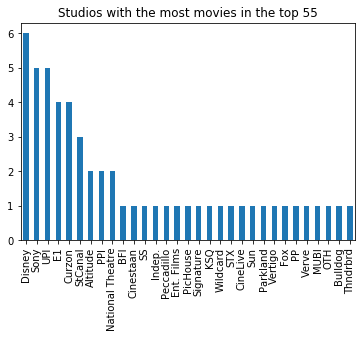

In [33]:
# Use the .value_counts() method to count the number of studios
data.Studio.value_counts().plot(kind='bar', title='Studios with the most movies in the top 55')
plt.show()

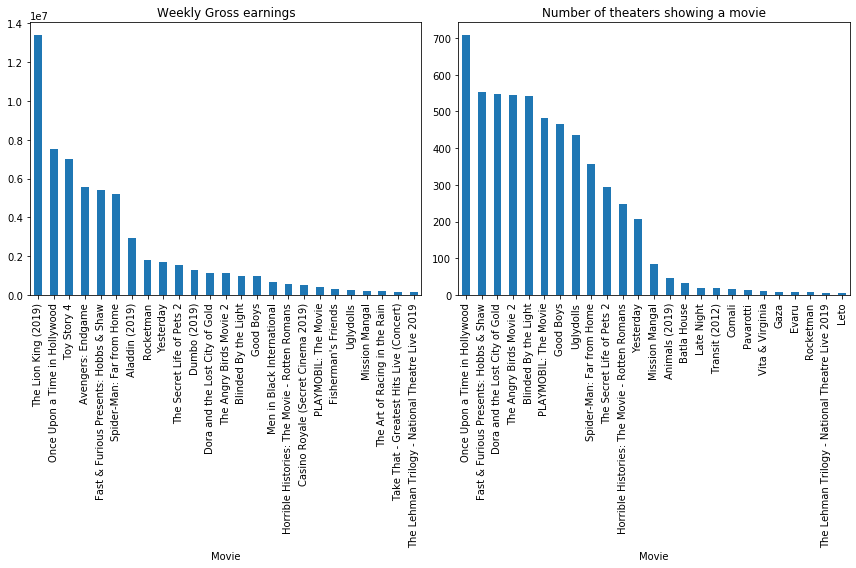

In [34]:
# Use the .sort_values() method to sort the values of a column
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8))

# ax1
data['Week AVG'].sort_values(ascending=False)[:25].plot(kind='bar', title='Weekly Gross earnings', ax=ax1)
# ax2
data['Theaters'].sort_values(ascending=False)[:25].plot(kind='bar', title='Number of theaters showing a movie', ax=ax2)

f.tight_layout()
plt.show()

## Exercise

Scrape the main table of [UK's Yearly Box Office](https://www.boxofficemojo.com/intl/uk/yearly/) and try to answer the following:
1. Which producers have the most films in the top 100? 
2. Can you find the gross earnings by distributor?

[Link to the solutions. Don't cheat!](https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/Web-Scraping/solutions.ipynb)

In [35]:
# That's the URL you should use
url = 'https://www.boxofficemojo.com/intl/uk/yearly/'

In [36]:
# Access the webpage content
# write your code here (~1 line)

In [37]:
# Parse the HTML page
# write your code here (~1 line)

In [38]:
# Choose the relevant table
# write your code here (~1 line)

In [39]:
# Parse and store the data of every table row
# write your code here (~4 lines)

In [40]:
# Concatenate the data in a Pandas DataFrame and place the first row of the DataFrame as header. Use the .head() method to check your DataFrame.
# write your code here (~5 lines)

In [41]:
# Q1: Count the films per distributor and plot them using a bar chart 
# write your code here (~1 line)

In [42]:
# Q2: Gross earnings by distributors

# Remove the £ symbol from the "Gross" column and transform strings to integers
# write your code here (~1 line)

# Group the data by Distributor and add the Gross value of their movies
# write your code here (~1 line)

## Advanced web scraping tools

**[Scrapy](https://scrapy.org)** is a Python framework for large scale web scraping. It gives you all the tools you need to efficiently extract data from websites, process them as you want, and store them in your preferred structure and format.

**[ARGUS](https://github.com/datawizard1337/ARGUS)** is an easy-to-use web mining tool that's built on Scrapy. It is able to crawl a broad range of different websites.

**[Selenium](https://selenium-python.readthedocs.io/index.html)** is an umbrella project encapsulating a variety of tools and libraries enabling web browser automation. Selenium specifically provides infrastructure for the W3C WebDriver specification — a platform and language-neutral coding interface compatible with all major web browsers. We can use it to imitate a user's behaviour and interact with Javascript elements (buttons, sliders etc.).

For now, let's see how Selenium works.

### How to install Selenium
1. If you are using Anaconda: `conda install -c conda-forge selenium `
2. Download the driver for your web browser for [here](https://selenium-python.readthedocs.io/installation.html#drivers). **Note:** Choose a driver that corresponds to your web browser's version. Unzip the file and move the executable to your working directory.

#### Important note on Selinium and web drivers
If you are running this notebook locally, follow the above steps and run the code directly below (change the path to where your web driver is located). If you are running this notebook on colab, skip the next cell and run the one below it.

### Scraping data with Selenium
We will use [UK's Yearly Box Office](https://www.boxofficemojo.com/intl/uk/yearly/) to scrape not only the top 100 but all the top movies of 2019. This will be our pipeline:

<img src='figures/selenium-pipeline.png' width='1024'>

In [55]:
# # RUN THIS CELL WHEN USING THE NOTEBOOK LOCALLY - YOU SHOULD INSTALL SELENIUM FIRST
import selenium.webdriver
# You may need to pass `executable_path` 
# See: https://github.com/SeleniumHQ/selenium/wiki/ChromeDriver
driver = selenium.webdriver.Chrome()

In [44]:
# # RUN THIS CELL WHEN USING THE NOTEBOOK ON COLAB - NO PREVIOUS INSTALLATION OF SELENIUM IS NEEDED
# # install chromium, its driver, and selenium
# !apt update
# !apt install chromium-chromedriver
# !pip install selenium
# # set options to be headless
# from selenium import webdriver
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# # open it, go to a website, and get results
# driver = webdriver.Chrome('chromedriver',options=options)

In [53]:
def html2df(source, q):
    """A wrapper of the scraping pipeline we used before."""
    # Parse the HTML page
    soup = BeautifulSoup(source, 'html.parser')

    # Choose the relevant table
    table = soup.find_all('table')[4]

    # Parse and store the data of every table row
    lst = []
    for row in table.find_all('tr'):
        s = pd.Series([data.text for data in row.find_all('td')])
        lst.append(s)

    # Concatenate the data in a Pandas DataFrame and place the first row of the DataFrame as header.
    data = pd.concat(lst, axis=1).T

    # Grab the first row for the header
    new_header = data.iloc[0]

    # Take the data less the header row
    data = data[1:]

    # Set the header row as the df header
    data.columns = new_header
    
    # Add a new column tagging the page we scraped
    data['page'] = q 
    
    return data

### About the `driver`
The `driver` object establishes a connection from this Python environment out to the browser window.

**Note:** A new Chrome window will pop-up when you run the code cell below.

In [56]:
# URL to use in Selenium
driver.get('https://www.boxofficemojo.com/intl/uk/yearly/')

In [58]:
lst = []
lst.append(html2df(driver.page_source, '#1'))
for i in ['#101', '#201', '#301', '#401']:
    # Locate Hyperlinks by partial link text
    elem = driver.find_element_by_partial_link_text(i)
    # Click on the next page
    elem.click()
    # Store the Pandas DataFrame with the scraped content in a list
    lst.append(html2df(driver.page_source, i))

# Concatenate all Pandas DataFrames
df = pd.concat(lst)

In [59]:
df.head(2)

,Rank,Movie Title,Distributor,Gross,Release,page
1,401,Jackpot (2019),Sun,"$9,470",8/2,#1
2,402,London Unplugged,Munro,"$9,470",1/18,#1


In [60]:
print(f'(MOVIES, COLUMNS) -> {df.shape}')

(MOVIES, COLUMNS) -> (500, 6)


## Exercise

Use Selenium to scrape Box Office Mojo's top \#100 for every year between 2002 and 2019.

[Link to the solutions. Don't cheat!](https://colab.research.google.com/github/nestauk/im-tutorials/blob/apis-web-scraping/notebooks/Web-Scraping/solutions.ipynb)

In [61]:
url = 'https://www.boxofficemojo.com/intl/uk/yearly/'

In [62]:
# URL to use in Selenium
# write your code here (~1 line)

lst = []
# Loop over the years.
# write your code here (~1-2 lines)

    # Locate Hyperlinks by partial link text
    # write your code here (~1 line)

    # Click on the next page
    # write your code here (~1 line)

    # Store the Pandas DataFrame with the scraped content in a list
    # write your code here (~1 line)

# Concatenate all Pandas DataFrames
# write your code here (~1 line)

## Ethical considerations

**You can scrape it, should you though?**

A very good summary of practices for [ethical web scraping](https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01):

* If you have a public API that provides the data I’m looking for, I’ll use it and avoid scraping all together.
* I will only save the data I absolutely need from your page.
* I will respect any content I do keep. I’ll never pass it off as my own.
* I will look for ways to return value to you. Maybe I can drive some (real) traffic to your site or credit you in an article or post.
* I will respond in a timely fashion to your outreach and work with you towards a resolution.
* I will scrape for the purpose of creating new value from the data, not to duplicate it.

Some other [important components](http://robertorocha.info/on-the-ethics-of-web-scraping/) of ethical web scraping practices include:

* Read the Terms of Service and Privacy Policies of a website before scraping it (this might not be possible in many situations though).
* If it’s not clear from looking at the website, contact the webmaster and ask if and what you’re allowed to harvest.
* Be gentle on smaller websites
    * Run your scraper in off-peak hours
    * Space out your requests.
* Identify yourself by name and email in your User-Agent strings.
* Inspecting the **robots.txt** file for rules about what pages can be scraped, indexed, etc.

### What is a robots.txt?

A simple text file placed on the web server which tells crawlers which file they can and cannot access. It's also called _The Robots Exclusion Protocol_.

<img src='figures/robots.png' width="600">

#### Some examples

In [63]:
print(requests.get('https://www.nesta.org.uk/robots.txt').text)
print('-----')
print(requests.get('https://www.boxofficemojo.com/robots.txt').text)
print('-----')
print(requests.get('https://www.howtogeek.com/robots.txt').text)

User-Agent: *

Disallow: /search/

Allow: /

-----
# robots.txt for http://www.boxofficemojo.com

User-agent: *
Disallow: /movies/default.movies.htm
Disallow: /showtimes/buy.php
Disallow: /forums/
Disallow: /derbygame/
Disallow: /grades/
Disallow: /moviehangman/
Disallow: /users/


-----
User-agent: *
Disallow: /em/
Disallow: /latest/
Disallow: /stats/
Disallow: /go/
Disallow: /wl/
Disallow: /g/
Disallow: /commonphp/
Disallow: /wp-admin/
Disallow: /thanks-for-subscribing/
Disallow: /131490/
Disallow: /167877/
Disallow: /178022/
Disallow: /178645/
Disallow: /wp-content/uploads/contentframe/
Allow: /




#
# Yahoo bot is evil.
#
User-agent: Slurp
Disallow: /

#
# Wut? 80 legs? Where do I get traffic from this?
#
User-agent: 008
Disallow: /	

#
# Yahoo Pipes is for feeds not web pages.
#
User-agent: Yahoo Pipes 1.0
Disallow: /

#
# There&#039;s no need to scan the forums for images
#
User-agent: Googlebot-Image
Disallow: /forum/

Sitemap: https://www.howtogeek.com/sitemap.xml


#### What's a User-Agent?

A User-Agent is a string identifying the browser and operating system to the web server. It's your machine's way of saying _Hi, I am Chrome on macOS_ to a web server.

Web servers use user agents for a variety of purposes:
* Serving different web pages to different web browsers. This can be used for good – for example, to serve simpler web pages to older browsers – or evil – for example, to display a “This web page must be viewed in Internet Explorer” message.
* Displaying different content to different operating systems – for example, by displaying a slimmed-down page on mobile devices.
* Gathering statistics showing the browsers and operating systems in use by their users. If you ever see browser market-share statistics, this is how they’re acquired.

Let's break down the structure of a human-operated User-Agent:

```Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405```

The components of this string are as follows:

* Mozilla/5.0: Previously used to indicate compatibility with the Mozilla rendering engine.
* (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us): Details of the system in which the browser is running.
* AppleWebKit/531.21.10: The platform the browser uses.
* (KHTML, like Gecko): Browser platform details.
* Mobile/7B405: This is used by the browser to indicate specific enhancements that are available directly in the browser or through third parties. An example of this is Microsoft Live Meeting which registers an extension so that the Live Meeting service knows if the software is already installed, which means it can provide a streamlined experience to joining meetings.

When scraping websites, it is a good idea to include your contact information as a custom **User-Agent** string so that the webmaster can get in contact. For example:

In [64]:
headers = {
    'User-Agent': 'Kostas Stathoulopoulos bot',
    'From': 'konstantinos.stathoulopoulos@nesta.org.uk'
}
request = requests.get('https://www.nesta.org.uk/', headers=headers)
print(request.request.headers)

{'User-Agent': 'Kostas Stathoulopoulos bot', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'From': 'konstantinos.stathoulopoulos@nesta.org.uk'}


## Additional resources/references:

* [Document Object Model (DOM)](https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model/Introduction)
* [HTML elements reference guide](https://www.w3schools.com/tags/default.asp)
* [About /robots.txt](https://www.robotstxt.org/robotstxt.html)
* [The robots.txt file](https://varvy.com/robottxt.html)
* [Ethics in Web Scraping](https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01)
* [On the Ethics of Web Scraping](http://robertorocha.info/on-the-ethics-of-web-scraping/)
* [User-Agent](https://en.wikipedia.org/wiki/User_agent)
* [BeautifulSoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Selinium Python - Unofficial documentation](https://selenium-python.readthedocs.io/)
* [ARGUS paper](http://ftp.zew.de/pub/zew-docs/dp/dp18033.pdf)
* [Brian's C. Keegan](http://www.brianckeegan.com/) excellent [5-week web scraping course](https://github.com/CU-ITSS/Web-Data-Scraping-S2019) intended for researchers in the social sciences and humanities.